# Preamble

In [75]:
#Initialization Cell
import numpy as np
import scipy.integrate as si
import matplotlib.pyplot as plt
import lmfit

plt.style.use('fivethirtyeight')
%matplotlib inline

plt.rcParams['figure.figsize']=[12.8*0.75, 9.6*0.75]
plt.rcParams['font.size']=20

In [78]:
plt.style.available

[u'seaborn-darkgrid',
 u'seaborn-notebook',
 u'classic',
 u'seaborn-ticks',
 u'grayscale',
 u'bmh',
 u'seaborn-talk',
 u'dark_background',
 u'ggplot',
 u'fivethirtyeight',
 u'_classic_test',
 u'seaborn-colorblind',
 u'seaborn-deep',
 u'seaborn-whitegrid',
 u'seaborn-bright',
 u'seaborn-poster',
 u'seaborn-muted',
 u'seaborn-paper',
 u'seaborn-white',
 u'seaborn-pastel',
 u'seaborn-dark',
 u'seaborn',
 u'presentation',
 u'seaborn-dark-palette']

In [81]:
x=np.array([i for i in range(100)])

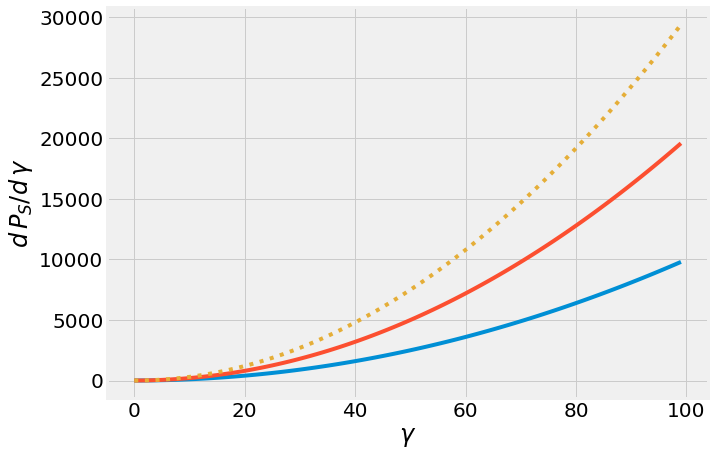

In [90]:
plt.plot(x,x**2)
plt.plot(x,2*x**2)
plt.plot(x,3*x**2,ls=':',marker='')
plt.xlabel(r'$\gamma$')
plt.ylabel(r'$d\,P_S/d\,\gamma$')

# Bayesian Inference (Wikipedia)

In [57]:
from IPython.display import HTML, YouTubeVideo, Markdown, IFrame
import wikipedia as wiki
import pypandoc

In [52]:
bayes=wiki.page("Bayesian Inference")
Markdown(pypandoc.convert_text(bayes.summary,'md','mediawiki'))

Bayesian inference is a method of statistical inference in which Bayes'
theorem is used to update the probability for a hypothesis as more
evidence or information becomes available. Bayesian inference is an
important technique in statistics, and especially in mathematical
statistics. Bayesian updating is particularly important in the dynamic
analysis of a sequence of data. Bayesian inference has found application
in a wide range of activities, including science, engineering,
philosophy, medicine, sport, and law. In the philosophy of decision
theory, Bayesian inference is closely related to subjective probability,
often called "Bayesian probability".


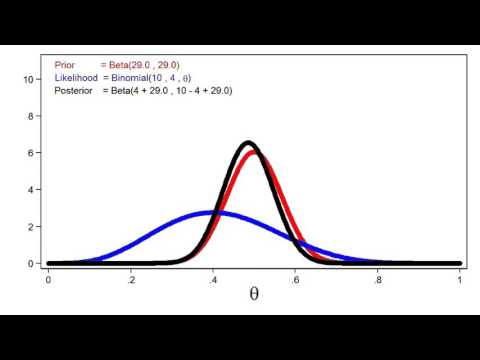

In [55]:
YouTubeVideo('0F0QoMCSKJ4')

# Bayesian Inference

## Bayesian vs Frequentist

### Frequentist Interpretation:

In [92]:
freq=wiki.page("Frequentist probability")
Markdown(freq.summary)

Frequentist probability or frequentism is an interpretation of probability; it defines an event's probability as the limit of its relative frequency in a large number of trials. This interpretation supports the statistical needs of experimental scientists and pollsters; probabilities can be found (in principle) by a repeatable objective process (and are thus ideally devoid of opinion). It does not support all needs; gamblers typically require estimates of the odds without experiments.
The development of the frequentist account was motivated by the problems and paradoxes of the previously dominant viewpoint, the classical interpretation. In the classical interpretation, probability was defined in terms of the principle of indifference, based on the natural symmetry of a problem, so, e.g. the probabilities of dice games arise from the natural symmetric 6-sidedness of the cube. This classical interpretation stumbled at any statistical problem that has no natural symmetry for reasoning.

### Bayesian Interpretation:

In [93]:
bayes=wiki.page("Bayesian probability")
Markdown(bayes.summary)

Bayesian probability is an interpretation of the concept of probability, in which, instead of frequency or propensity of some phenomenon, probability is interpreted as reasonable expectation representing a state of knowledge or as quantification of a personal belief.
The Bayesian interpretation of probability can be seen as an extension of propositional logic that enables reasoning with hypotheses, i.e., the propositions whose truth or falsity is uncertain. In the Bayesian view, a probability is assigned to a hypothesis, whereas under frequentist inference, a hypothesis is typically tested without being assigned a probability.
Bayesian probability belongs to the category of evidential probabilities; to evaluate the probability of a hypothesis, the Bayesian probabilist specifies some prior probability, which is then updated to a posterior probability in the light of new, relevant data (evidence). The Bayesian interpretation provides a standard set of procedures and formulae to perform this calculation.
The term Bayesian derives from the 18th century mathematician and theologian Thomas Bayes, who provided the first mathematical treatment of a non-trivial problem of Bayesian inference. Mathematician Pierre-Simon Laplace pioneered and popularised what is now called Bayesian probability.
Broadly speaking, there are two views on Bayesian probability that interpret the probability concept in different ways. According to the objectivist view, probability is a reasonable expectation that represents the state of knowledge, can be interpreted as an extension of logic, and its rules can be justified by Cox's theorem. According to the subjectivist view, probability quantifies a personal belief, and its rules can be justified by requirements of rationality and coherence following from the Dutch book argument or from the decision theory and de Finetti's theorem.

## Bayes theorem redux

The Bayesian inference is built upon the Bayes-theorem:
$$P(H|D)=\frac{P(H)\times P(D|H)}{P(D)}$$
where, M and D stands for the hypothesis being tested and D is the data.

The Bayes theorem should be interpreted as follows:
1. P(H|D) is called the **posterior** the probability of the hypothesis given the observed data.
2. P(H) is called the **prior**. It quantifies your **a priori** degree of belief in the Hypothesis. In other words, it quantify your confidence/prejudice on the hypothesis **before** looking on the **new** data
3. P(D|H) is called the **likelihood**. It is the probability of obtaining the data from a random sampling the hypothesis.
4. P(D) is called the **evidence** or **marginal likelihood**. The second name is due to the fact that since the posterior has to be normalized to unity this term is a normalization factor coming from the integration of the dividend over the hypothesis (this operation is called **marginalization**). *In summa*, It quantifies the overall performance of your hypothesis explaining the occurrence of the data;
    1. Unimportant for parameter estimation.
    2. Extremely important for model judgment.
    
An important note! The **posterior** is many times confused with the **likelihood**. That's due to the fact that in the case of a *flat* prior they are numerically equal. But remember that one is function of the data and the other is a function of the hypothesis!

## Likelihood construction

In many analysis cosmologists begin their analysis upon the hypothesis that the likelihood is a Gaussian distribution on the Data. In other words, the observed data is a random sample that obeys a multi-variated distribution. Many reasons justify why it is a good hypothesis (but not always!). Usually those reasons are related with the *central limit theorem*.

- Many distributions has the normal distribution as a limit
    - Binomial
    - Poisson
    - (...)
- If a process is resulted by the convolution of many other sub-processes the distribution of the process tend to be Gaussian. (Challenge: test that! Start with a very skewed distribution and iteratively convolve it with itself. After how many iterations you are not able to distinguish it anymore from a gaussian?)

### Gaussian likelihood

 A Gaussian distribution is defined by two quantities:
 - The mean:
     - For this case it coincides with the most probable value.
 - The variance:
     - The spread of the distribution around the mean.

### SNe Likelihood (Union 2.1)

Union2.1 catalog has a simplistic likelihood where each SN is assumed to be independent.

1. Let's import Union 2.1 data (http://supernova.lbl.gov/union/figures/SCPUnion2.1_mu_vs_z.txt)

In [66]:
%%bash 
wget supernova.lbl.gov/union/figures/SCPUnion2.1_mu_vs_z.txt

--2017-05-18 12:49:25--  http://supernova.lbl.gov/union/figures/SCPUnion2.1_mu_vs_z.txt
Resolving supernova.lbl.gov (supernova.lbl.gov)... 128.3.28.216
Connecting to supernova.lbl.gov (supernova.lbl.gov)|128.3.28.216|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 33899 (33K) [text/plain]
Saving to: ‘SCPUnion2.1_mu_vs_z.txt’

     0K .......... .......... .......... ...                  100% 44.1K=0.8s

2017-05-18 12:49:27 (44.1 KB/s) - ‘SCPUnion2.1_mu_vs_z.txt’ saved [33899/33899]



In [94]:
union21=np.loadtxt('SCPUnion2.1_mu_vs_z.txt',dtype={'names': ('name', 'z', 'mu','mu_error','XXX'),
...                      'formats': ('S6', 'f', 'f','f','f')})

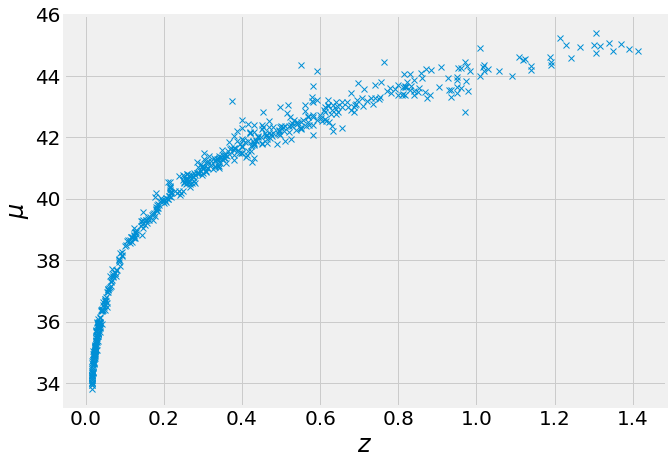

In [74]:
plt.plot(union21['z'],union21['mu'],ls='None',marker='x')
plt.xlabel(r'$z$')
plt.ylabel(r'$\mu$')

Challenge: 
 1. Write the union21 likelihood function!
 2. Add this to your Cosmology Class!

In [98]:
data=union21['mu'][(union21['z']>0.5) & (union21['z']<0.6)]

In [100]:
mean=data.mean()

In [102]:
data_zero_mean=data-mean

(array([ 0.,  1.,  1.,  2.,  5.,  9.,  8.,  4.,  3.,  1.,  2.,  3.,  1.,
         0.,  0.]),
 array([-1.        , -0.86666667, -0.73333333, -0.6       , -0.46666667,
        -0.33333333, -0.2       , -0.06666667,  0.06666667,  0.2       ,
         0.33333333,  0.46666667,  0.6       ,  0.73333333,  0.86666667,  1.        ]),
 <a list of 15 Patch objects>)

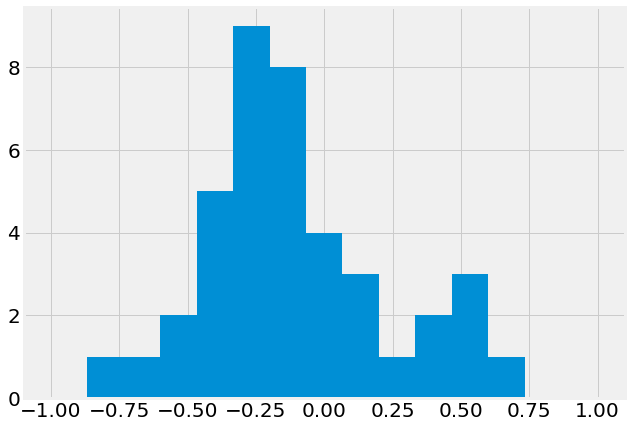

In [107]:
plt.hist(data_zero_mean,bins=15,range=(-1,1))

In [125]:
from cosmolopy.distance import luminosity_distance as dl

In [128]:
def mu (z,om,ol,h):

    cosmo = {'omega_M_0' : om, 'omega_lambda_0' : ol, 'h' : h,'omega_k_0':0}
    return 5*np.log10(dl(z,**cosmo))+5+19.3081547178
    

In [133]:
def lhood_sne (om,ol,h):
    
    mu_teo=mu(union21['z'],om,ol,h)
    chiq=((mu_teo-union21['mu'])/union21['mu_error'])**2
    return np.exp(-1./2*chiq.sum())
